In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

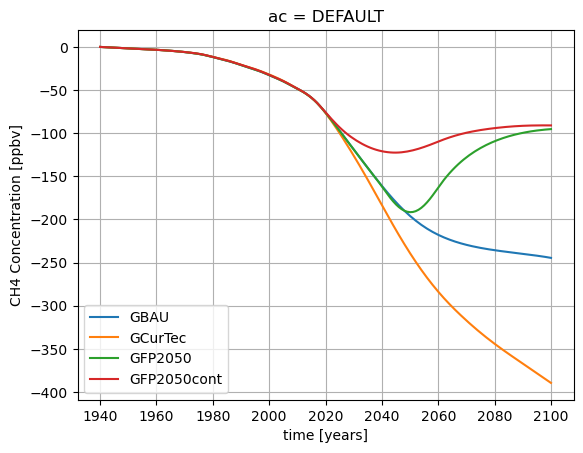

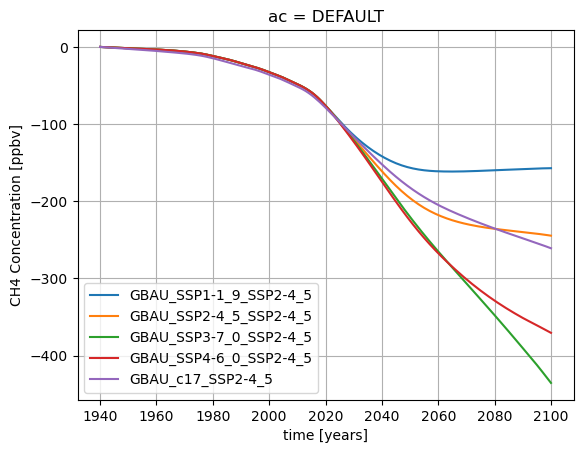

<xarray.Dataset> Size: 36kB
Dimensions:   (year: 751)
Coordinates:
  * year      (year) int64 6kB 1750 1751 1752 1753 1754 ... 2497 2498 2499 2500
Data variables:
    SSP1-1.9  (year) float64 6kB 731.4 731.8 732.9 733.6 ... 871.4 871.4 871.4
    SSP2-4.5  (year) float64 6kB 731.4 731.8 732.9 733.6 ... 997.3 997.3 997.3
    SSP3-7.0  (year) float64 6kB 731.4 731.8 732.9 ... 1.939e+03 1.938e+03
    SSP4-6.0  (year) float64 6kB 731.4 731.8 732.9 ... 1.786e+03 1.786e+03
    SSP5-8.5  (year) float64 6kB 731.4 731.8 732.9 ... 1.019e+03 1.019e+03
Attributes:
    Title:      CH4 background scenarios
    long_name:  CH4 concentration
    units:      ppb
    Reference:  Meinshausen, M., Nicholls, Z. R., Lewis, J., Gidden, M. J., V...
    URL:        https://doi.org/10.5194/gmd-13-3571-2020

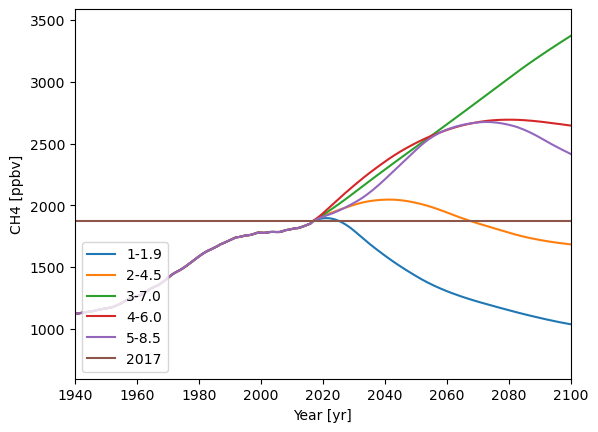

In [6]:
for scenario in ["GBAU", "GCurTec", "GFP2050", "GFP2050cont"]:
    ds_p = f"results_{scenario}/{scenario}.nc"
    ds = xr.open_dataset(ds_p)
    plt.figure('CH4')
    ds['conc_CH4'][0].plot(x="time", label=scenario)
    plt.legend(loc='lower left')

    # plt.figure('SWV')
    # ds['RF_SWV'][0].plot(x="time", label=scenario+ '_swv')
    # ds['RF_CH4'][0].plot(x="time", label=scenario + '_ch4', linestyle='--')
    # plt.legend()
plt.grid()
plt.show()

for scenario in ["GBAU_SSP1-1_9", "GBAU_SSP2-4_5", "GBAU_SSP3-7_0", "GBAU_SSP4-6_0", "GBAU_c17"]:
    ds_p = f"results_{scenario}/{scenario}.nc"
    ds = xr.open_dataset(ds_p)
    plt.figure('CH4')
    if scenario != "c2017":
        ds['conc_CH4'][0].plot(x="time", label=scenario+"_SSP2-4_5")
    else:
        ds['conc_CH4'][0].plot(x="time", label=scenario+"_SSPc2017")

    plt.legend()

    # plt.figure('SWV')
    # ds['RF_SWV'][0].plot(x="time", label=scenario+ '_swv')
    # ds['RF_CH4'][0].plot(x="time", label=scenario + '_ch4', linestyle='--')
    # plt.legend()
plt.grid()
plt.show()

ch4_bg = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\ch4_bg.nc"
ch4_bg_cons = xr.open_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\bg_ch4_c17.nc")
xrds_ch4_bg = xr.load_dataset(ch4_bg)
display(xrds_ch4_bg)
xrds_ch4_bg.data_vars['SSP1-1.9'].plot(label='1-1.9')
xrds_ch4_bg.data_vars['SSP2-4.5'].plot(label='2-4.5')
xrds_ch4_bg.data_vars['SSP3-7.0'].plot(label='3-7.0')
xrds_ch4_bg.data_vars['SSP4-6.0'].plot(label='4-6.0')
xrds_ch4_bg.data_vars['SSP5-8.5'].plot(label='5-8.5')
ch4_bg_cons.data_vars['constant_2017'].plot(label='2017')
q = xrds_ch4_bg.data_vars['SSP5-8.5'][:250]
# q.plot()
plt.xlim([1940,2100])
# plt.ylim([1700,1900])
plt.ylabel('CH4 [ppbv]')
plt.legend(loc="lower left")
plt.show()

C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\1570192740.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\1570192740.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\1570192740.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\1570192740.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\1570192740.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4


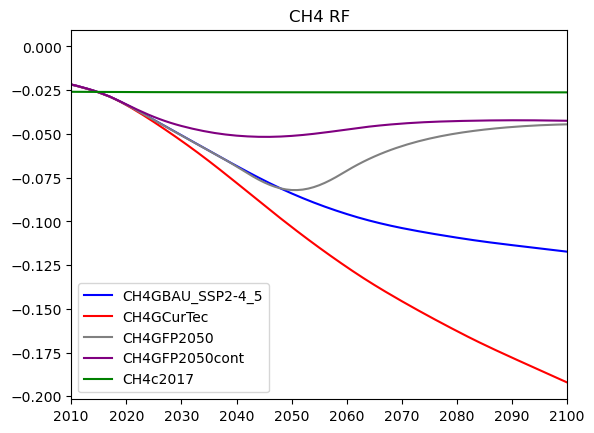

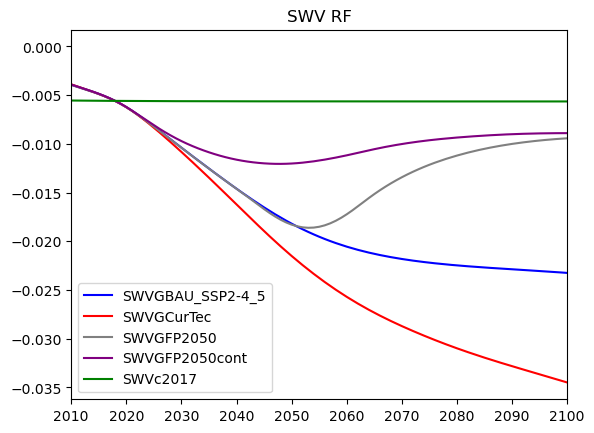

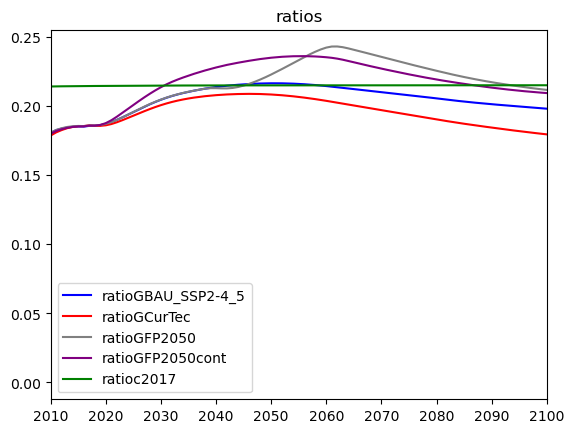

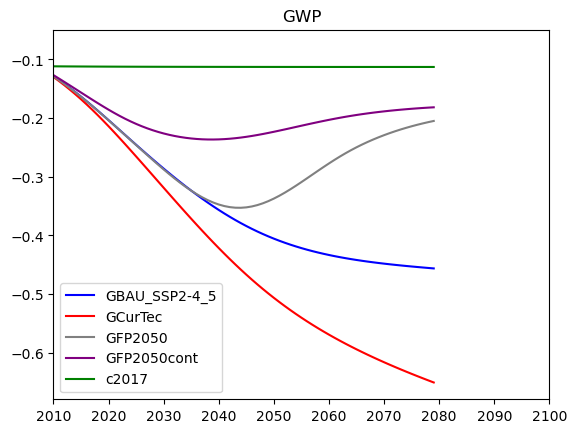

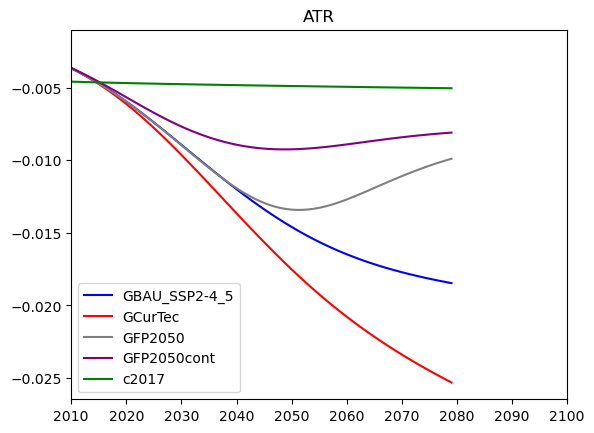

In [5]:
# results

scenarios = ["GBAU_SSP2-4_5", "GCurTec", "GFP2050", "GFP2050cont", "c2017"]

# SWV_RF = 1
# CH4_RF = 1
# SWV_conc = 1
# ratio_RF = 1

# NOx_species = ['PMO', 'CH4', 'SWV', 'O3']
scenario_color = {"GCurTec": 'r',
             "GBAU_SSP1-1_9": 'g',
             "GBAU_SSP2-4_5": 'b',
             "GBAU_SSP3-7_0": 'y',
             "GBAU_SSP4-6_0": 'black', 
             "GFP2050": 'grey', 
             "GFP2050cont": 'purple',
             "c2017": 'green',}

for scenario in scenarios:
    # if scenario != 'GFP2050':
    #     continue
    ds_path = f"results_{scenario}/{scenario}.nc"
    data = xr.open_dataset(ds_path)
    metric = xr.open_dataset(f"results_{scenario}/{scenario}_metrics.nc")

    rf_SWV = data[f'RF_SWV'][0].values
    rf_CH4 = data[f'RF_CH4'][0].values
    try:
        ratio = rf_SWV/rf_CH4
    except RuntimeError:
        ratio = []
        for i in range(len(rf_SWV)):
            ratio[i] = rf_SWV[i]/rf_CH4[i]
    
    plt.figure('CH4')
    plt.plot(data['time'].values, rf_CH4, label='CH4'+scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("CH4 RF")
    plt.xlim([2010,2100])

    
    plt.figure('SWV')
    plt.plot(data['time'].values, rf_SWV, label='SWV'+scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("SWV RF")
    plt.xlim([2010,2100])
    
    plt.figure('ratio')
    plt.plot(data['time'].values, ratio, label='ratio'+scenario,color=scenario_color[scenario])
    plt.legend()
    plt.title("ratios")
    plt.xlim([2010,2100])
    
    GWP_SWV = []
    GWP_tot = []
    ATR_SWV = []
    ATR_tot = []
    for year in range(2000,2080):
        # year =2000
        GWP_SWV.append(metric[f'AGWP_20_{year}'].values[-2])
        GWP_tot.append(metric[f'AGWP_20_{year}'].values[-1])
        ATR_SWV.append(metric[f'ATR_20_{year}'].values[-2])
        ATR_tot.append(metric[f'ATR_20_{year}'].values[-1])
        # print(year, GWP_SWV)
    plt.figure('GWP')
    plt.plot(range(2000,2080), GWP_SWV, label=scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("GWP")
    plt.xlim([2010,2100])
    
    plt.figure('ATR')
    plt.plot(range(2000,2080), ATR_SWV, label=scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("ATR")
    plt.xlim([2010,2100])  


plt.show()


# for scenario in scenarios:
#     # if scenario != 'GFP2050':
#     #     continue
#     ds_path = f"results_{scenario}/{scenario}.nc"
#     data = xr.open_dataset(ds_path)
#     SWV = data[f'RF_SWV'][0].values
#     # CH4 = data[f'RF_CH4'][0].values
#     # ratio = SWV/CH4
#     plt.plot(data['time'].values, SWV, label='SWV'+scenario, color=scenarios[scenario])
# plt.legend()
# plt.title("SWV")
# plt.show()
#         
# for scenario in scenarios:
#     # if scenario != 'GFP2050':
#     #     continue
#     ds_path = f"results_{scenario}/{scenario}.nc"
#     data = xr.open_dataset(ds_path)
#     CH4 = data[f'RF_CH4'][0].values
#     # CH4 = data[f'RF_CH4'][0].values
#     # ratio = SWV/CH4
#     plt.plot(data['time'].values, CH4, label='CH4'+scenario, color=scenarios[scenario])
# plt.legend()
# # plt.title("CH4")
# plt.show()

In [16]:
metric = xr.load_dataset(f"results_{scenario}/{scenario}_metrics.nc")

C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2694907505.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2694907505.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2694907505.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2694907505.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2694907505.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4


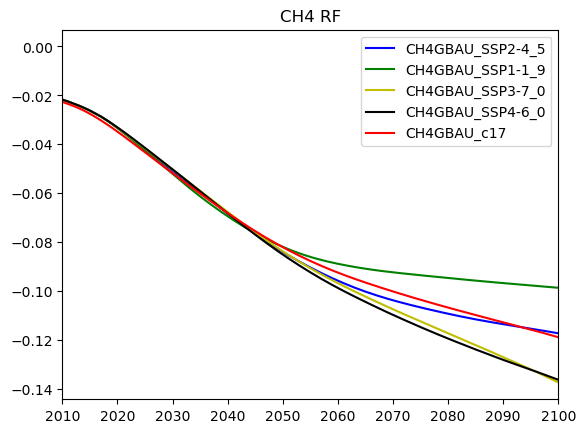

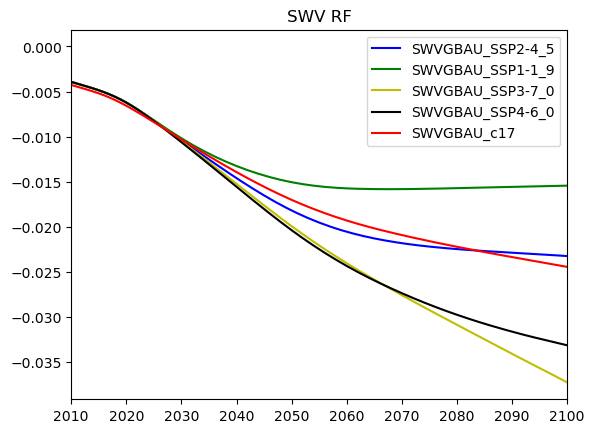

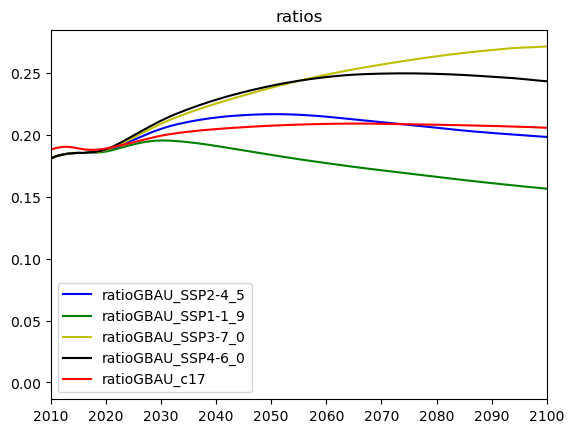

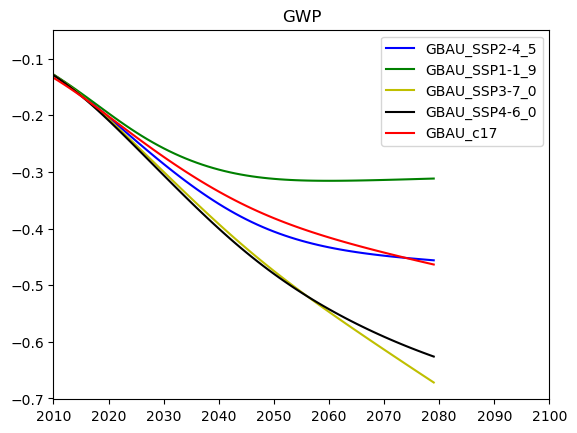

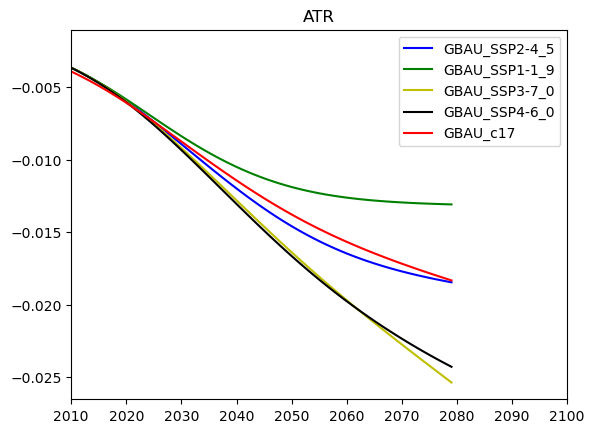

In [6]:
# results

scenarios = ["GBAU_SSP2-4_5", "GBAU_SSP1-1_9", "GBAU_SSP3-7_0", "GBAU_SSP4-6_0", "GBAU_c17"]

# NOx_species = ['PMO', 'CH4', 'SWV', 'O3']
scenario_color = {"GBAU_c17": 'r',
             "GBAU_SSP1-1_9": 'g',
             "GBAU_SSP2-4_5": 'b',
             "GBAU_SSP3-7_0": 'y',
             "GBAU_SSP4-6_0": 'black', 
             "GFP2050": 'grey', 
             "GFP2050cont": 'purple',
             "c2017": 'green',}

for scenario in scenarios:
    # if scenario != 'GFP2050':
    #     continue
    ds_path = f"results_{scenario}/{scenario}.nc"
    data = xr.open_dataset(ds_path)
    metric = xr.open_dataset(f"results_{scenario}/{scenario}_metrics.nc")

    rf_SWV = data[f'RF_SWV'][0].values
    rf_CH4 = data[f'RF_CH4'][0].values
    try:
        ratio = rf_SWV/rf_CH4
    except RuntimeError:
        ratio = []
        for i in range(len(rf_SWV)):
            ratio[i] = rf_SWV[i]/rf_CH4[i]
    
    plt.figure('CH4')
    plt.plot(data['time'].values, rf_CH4, label='CH4'+scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("CH4 RF")
    plt.xlim([2010,2100])

    
    plt.figure('SWV')
    plt.plot(data['time'].values, rf_SWV, label='SWV'+scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("SWV RF")
    plt.xlim([2010,2100])
    
    plt.figure('ratio')
    plt.plot(data['time'].values, ratio, label='ratio'+scenario,color=scenario_color[scenario])
    plt.legend()
    plt.title("ratios")
    plt.xlim([2010,2100])
    
    GWP_SWV = []
    GWP_tot = []
    ATR_SWV = []
    ATR_tot = []
    for year in range(2000,2080):
        # year =2000
        GWP_SWV.append(metric[f'AGWP_20_{year}'].values[-2])
        GWP_tot.append(metric[f'AGWP_20_{year}'].values[-1])
        ATR_SWV.append(metric[f'ATR_20_{year}'].values[-2])
        ATR_tot.append(metric[f'ATR_20_{year}'].values[-1])
        # print(year, GWP_SWV)
    plt.figure('GWP')
    plt.plot(range(2000,2080), GWP_SWV, label=scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("GWP")
    plt.xlim([2010,2100])
    
    plt.figure('ATR')
    plt.plot(range(2000,2080), ATR_SWV, label=scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("ATR")
    plt.xlim([2010,2100])  


plt.show()

C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2960161154.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2960161154.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2960161154.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2960161154.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_3844\2960161154.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = rf_SWV/rf_CH4


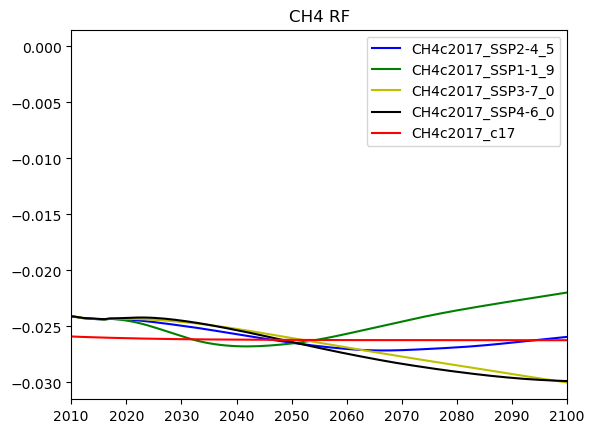

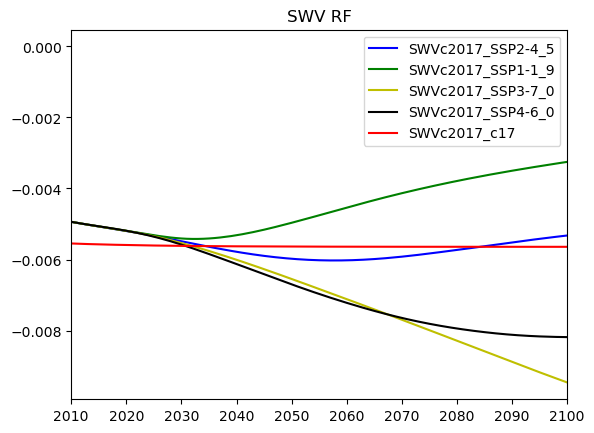

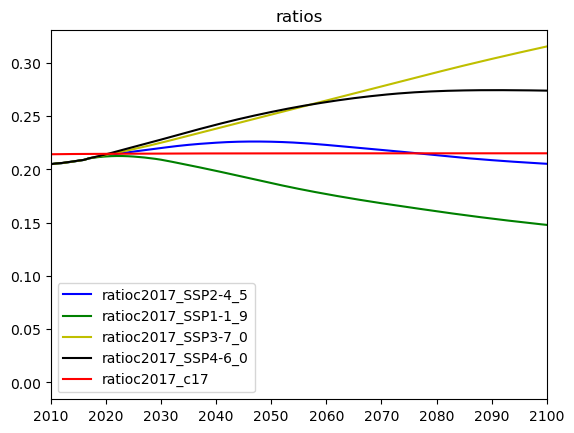

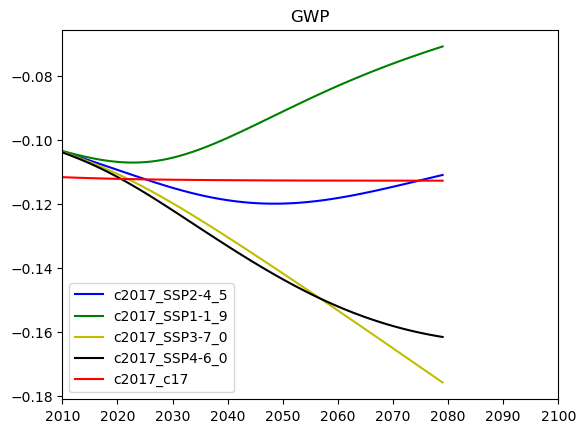

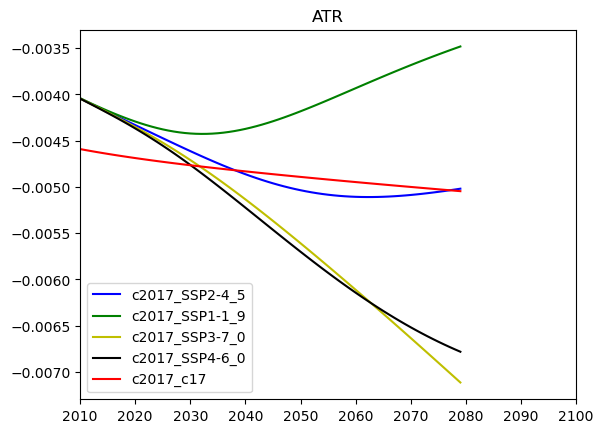

In [9]:
# results

scenarios = ["c2017_SSP2-4_5", "c2017_SSP1-1_9", "c2017_SSP3-7_0", "c2017_SSP4-6_0", "c2017_c17"]

# NOx_species = ['PMO', 'CH4', 'SWV', 'O3']
scenario_color = {"c2017_c17": 'r',
             "c2017_SSP1-1_9": 'g',
             "c2017_SSP2-4_5": 'b',
             "c2017_SSP3-7_0": 'y',
             "c2017_SSP4-6_0": 'black', 
             "GFP2050": 'grey', 
             "GFP2050cont": 'purple',
             "c2017": 'green',}

for scenario in scenarios:
    # if scenario != 'GFP2050':
    #     continue
    ds_path = f"results_{scenario}/{scenario}.nc"
    data = xr.open_dataset(ds_path)
    metric = xr.open_dataset(f"results_{scenario}/{scenario}_metrics.nc")

    rf_SWV = data[f'RF_SWV'][0].values
    rf_CH4 = data[f'RF_CH4'][0].values
    try:
        ratio = rf_SWV/rf_CH4
    except RuntimeError:
        ratio = []
        for i in range(len(rf_SWV)):
            ratio[i] = rf_SWV[i]/rf_CH4[i]
    
    plt.figure('CH4')
    plt.plot(data['time'].values, rf_CH4, label='CH4'+scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("CH4 RF")
    plt.xlim([2010,2100])

    
    plt.figure('SWV')
    plt.plot(data['time'].values, rf_SWV, label='SWV'+scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("SWV RF")
    plt.xlim([2010,2100])
    
    plt.figure('ratio')
    plt.plot(data['time'].values, ratio, label='ratio'+scenario,color=scenario_color[scenario])
    plt.legend()
    plt.title("ratios")
    plt.xlim([2010,2100])
    
    GWP_SWV = []
    GWP_tot = []
    ATR_SWV = []
    ATR_tot = []
    for year in range(2000,2080):
        # year =2000
        GWP_SWV.append(metric[f'AGWP_20_{year}'].values[-2])
        GWP_tot.append(metric[f'AGWP_20_{year}'].values[-1])
        ATR_SWV.append(metric[f'ATR_20_{year}'].values[-2])
        ATR_tot.append(metric[f'ATR_20_{year}'].values[-1])
        # print(year, GWP_SWV)
    plt.figure('GWP')
    plt.plot(range(2000,2080), GWP_SWV, label=scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("GWP")
    plt.xlim([2010,2100])
    
    plt.figure('ATR')
    plt.plot(range(2000,2080), ATR_SWV, label=scenario, color=scenario_color[scenario])
    plt.legend()
    plt.title("ATR")
    plt.xlim([2010,2100])  


plt.show()

2000 [np.float32(-0.1107767)]
2001 [np.float32(-0.1107767), np.float32(-0.110902905)]
2002 [np.float32(-0.1107767), np.float32(-0.110902905), np.float32(-0.11102134)]
2003 [np.float32(-0.1107767), np.float32(-0.110902905), np.float32(-0.11102134), np.float32(-0.11113248)]
2004 [np.float32(-0.1107767), np.float32(-0.110902905), np.float32(-0.11102134), np.float32(-0.11113248), np.float32(-0.111236796)]
2005 [np.float32(-0.1107767), np.float32(-0.110902905), np.float32(-0.11102134), np.float32(-0.11113248), np.float32(-0.111236796), np.float32(-0.11133472)]
2006 [np.float32(-0.1107767), np.float32(-0.110902905), np.float32(-0.11102134), np.float32(-0.11113248), np.float32(-0.111236796), np.float32(-0.11133472), np.float32(-0.11142667)]
2007 [np.float32(-0.1107767), np.float32(-0.110902905), np.float32(-0.11102134), np.float32(-0.11113248), np.float32(-0.111236796), np.float32(-0.11133472), np.float32(-0.11142667), np.float32(-0.111513026)]
2008 [np.float32(-0.1107767), np.float32(-0.1109

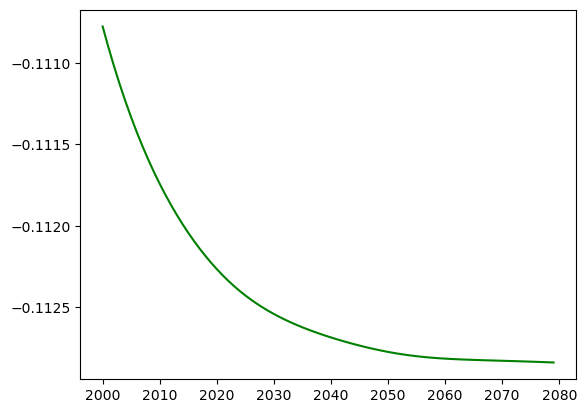

In [40]:
GWP_SWV = []
GWP_tot = []
ATR_SWV = []
ATR_tot = []


for year in range(2000,2080):
    # year =2000
    GWP_SWV.append(metric[f'AGWP_20_{year}'].values[-2])
    GWP_tot.append(metric[f'AGWP_20_{year}'].values[-1])
    ATR_SWV.append(metric[f'ATR_20_{year}'].values[-2])
    ATR_tot.append(metric[f'ATR_20_{year}'].values[-1])
    # print(year, GWP_SWV)
plt.plot(range(2000,2080), GWP_SWV, label='SWV', color=scenario_color[scenario])

read_config ln. 254 in check_against_template INFO: Get default value for: responses CO2 rf method 
read_config ln. 254 in check_against_template INFO: Get default value for: responses cont method 
read_config ln. 532 in check_metrics_time WARNING: Last year in metrics time with t_0 = 2000 and H = 20 is earlier than last year in time range.
read_config ln. 183 in check_config INFO: Configuration file checked.
read_config ln. 380 in create_output_dir INFO: Overwrite existing output directory results_c2017/
read_netcdf ln. 173 in open_inventories INFO: Emission inventories openend, attribute sections and time constraints checked successfully.
read_netcdf ln. 220 in split_inventory_by_aircraft WARNING: No ac coordinate found in emission inventory for year 2020. Reverting to 'DEFAULT' aircraft from config file.
calc_response ln. 131 in calc_resp_all WARNING: O3 response surface is not validated!
main ln. 175 in run WARNING: CH4 response surface is not validated!
calc_response ln. 172 in ca

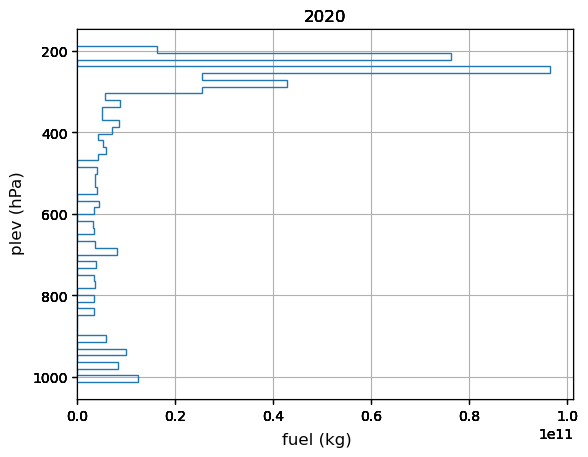

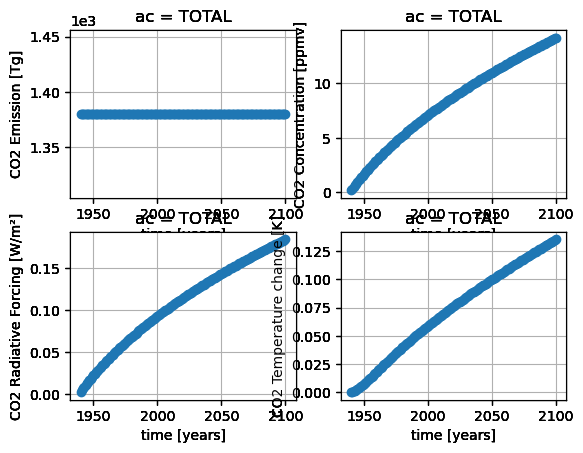

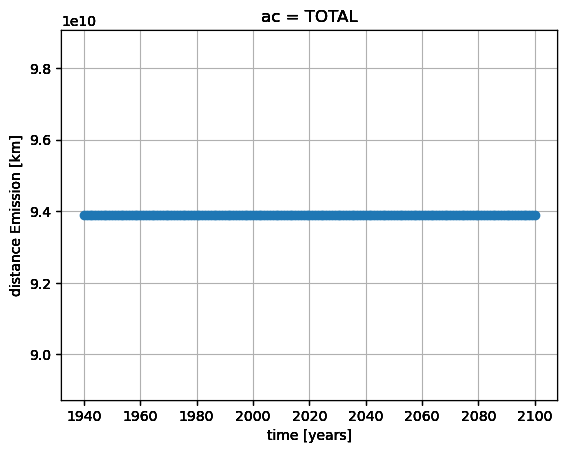

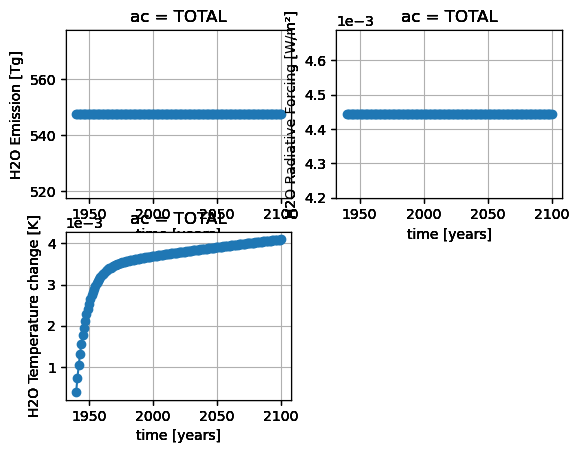

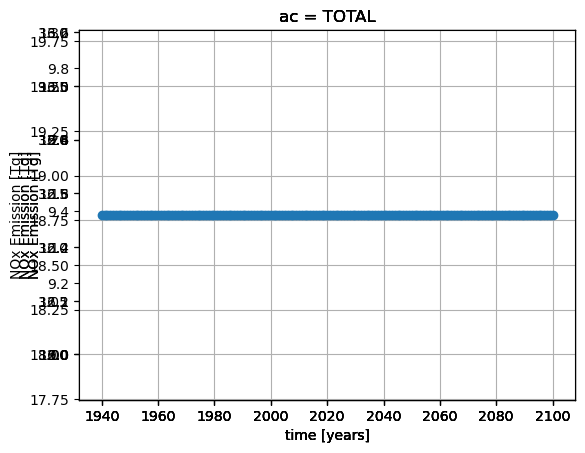

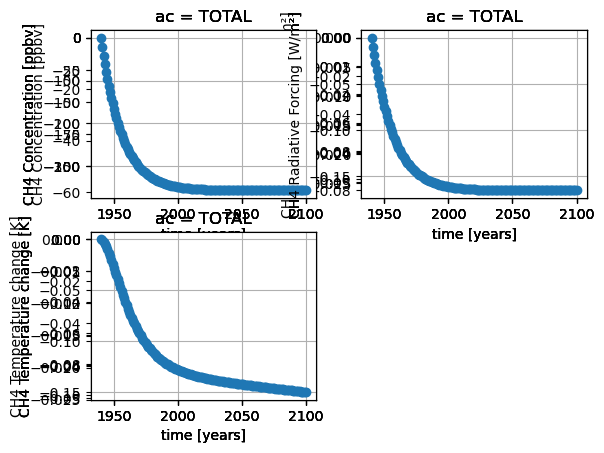

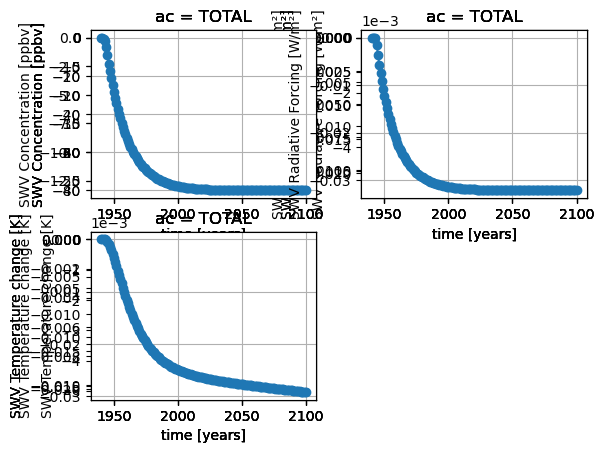

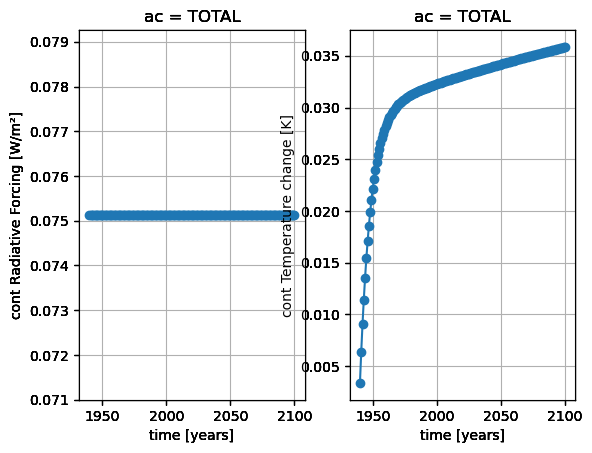

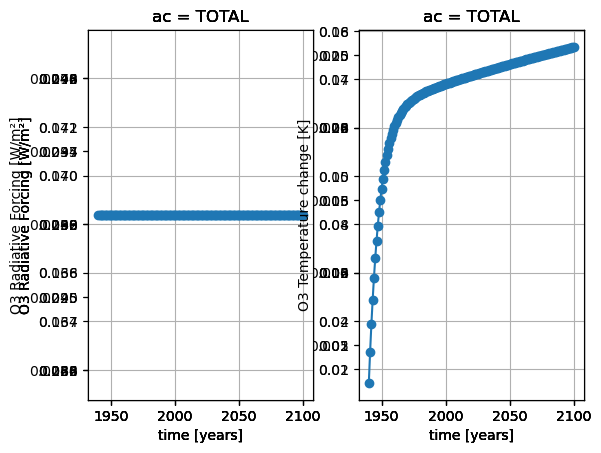

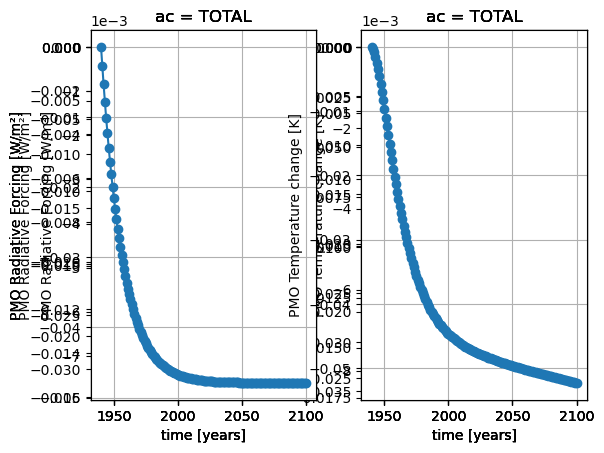

In [3]:
import matplotlib.pyplot as plt
import os
import openairclim as oac
import sys
import numpy as np
from create_time_evolution_adapted import (
    create_time_normalization_xr,
    convert_xr_to_nc,
)
import xarray as xr

# make an evolution for a constant emission equal to the 2017 value, as there values for all scenarios are the same
NORM_TIME = np.arange(1940,2101,1)
fuel_2017 = 4.38E+11 #kg
nox_emis_2017_list = [3.13E+09,6.26E+09,9.39E+09, 2*6.26E+09, 2*9.39E+09,] #kg
co2_emis_2017 = 1.38E+12 #kg
distance_2017 = 9.39E+10 #km


FUEL_ARR = np.ones(len(NORM_TIME)) * fuel_2017 / 1e9
EI_CO2_ARR = np.ones(len(NORM_TIME)) * co2_emis_2017/ 1e9 / FUEL_ARR
EI_H2O_ARR = 1.25 * np.ones(
    len(NORM_TIME), dtype="float32"
)  # TODO H2O not defined by Grewe scenarios
DIS_PER_FUEL_ARR = np.ones(len(NORM_TIME)) * distance_2017 / FUEL_ARR / 1e9
ratio_dict = {}
for nox_emis_2017 in nox_emis_2017_list:
    EI_NOx_ARR = np.ones(len(NORM_TIME)) * nox_emis_2017/1e9 / FUEL_ARR

    norm_ds = create_time_normalization_xr(
        time_arr=NORM_TIME,
        fuel_arr=FUEL_ARR,
        ei_co2_arr=EI_CO2_ARR,
        ei_h2o_arr=EI_H2O_ARR,
        ei_nox_arr=EI_NOx_ARR,
        dis_per_fuel_arr=DIS_PER_FUEL_ARR,
    )
    convert_xr_to_nc(
        norm_ds, 'constant_2017' + "_evo", "../Scenario_Analysis/evolution/"
    )
    # plot_time_norm(norm_ds)


    # RUN OAC
    sys.path.append("../../openairclim")
    oac.run(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\c2017.toml")
    
    result_2017 = xr.load_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\results_c2017\c2017.nc")
    
    ratio = []
    for i in range(len(result_2017['RF_SWV'][0].values)):
        try:
            ratio.append(result_2017['RF_SWV'][0].values[i]/result_2017['RF_CH4'][0].values[i])
        except FloatingPointError:
            ratio.append(0)
    
    # plt.plot(result_2017['time'].values, ratio)
    ratio_dict[nox_emis_2017] = {}
    ratio_dict[nox_emis_2017]['ratio'] = ratio
    ratio_dict[nox_emis_2017]['SWV'] = result_2017['RF_SWV'][0].values
    ratio_dict[nox_emis_2017]['CH4'] = result_2017['RF_CH4'][0].values
    ratio_dict[nox_emis_2017]['CH4_conc'] = result_2017['conc_CH4'][0].values
    
    
    
plt.show()

3130000000.0
0.21236891244737646
6260000000.0
0.2182919739279678
9390000000.0
0.21472825492443223
12520000000.0
0.20885961989364019
18780000000.0
0.19499810355696942


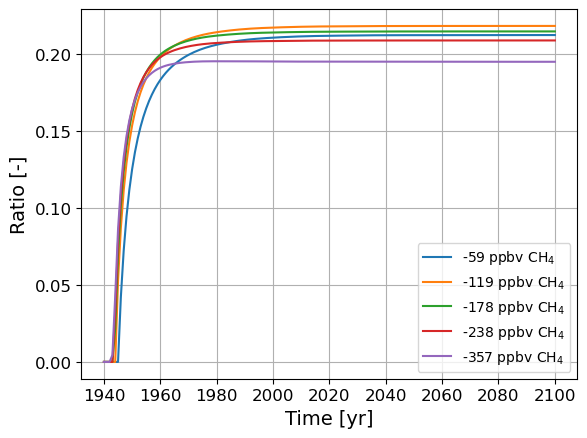

In [16]:
for key in ratio_dict.keys():
    print(key)
    ratio = ratio_dict[key]['ratio']
    label = int(ratio_dict[key]['CH4_conc'][-1].round(0))
    plt.plot(NORM_TIME, ratio, label=str(label) + r' ppbv CH$_4$')
    print(ratio[-1])
plt.xlabel("Time [yr]", fontsize=14)
plt.ylabel("Ratio [-]",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid()
plt.show()

# for key in ratio_dict.keys():
#     print(key)
#     swv = ratio_dict[key]['SWV']
#     ch4 = ratio_dict[key]['CH4']
#     plt.plot(NORM_TIME, swv, label='swv '+str(key/1e9) + 'Tg Nox')
#     plt.plot(NORM_TIME, ch4, label='ch4 '+str(key/1e9) + 'Tg Nox')
#     # print(ratio[-1])
# plt.legend()
# plt.show()

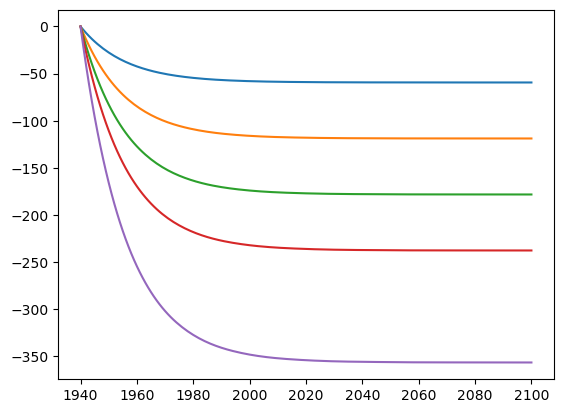

In [5]:
for key in ratio_dict.keys():
    ch4_conc = ratio_dict[key]['CH4_conc']
    plt.plot(NORM_TIME, ch4_conc, label='ch4_conc')
    
plt.show()